# House Pricing Predictions  using Linear Regression Model

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')

In [4]:
data = pd.read_csv('Raw_Housing_Prices.csv')
data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [5]:
data.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [6]:
data.shape

(21613, 21)

In [7]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

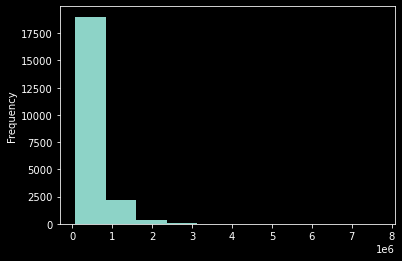

In [8]:
#distribution of target variable
data['Sale Price'].plot.hist()

In [12]:
#imputing outliers
q1=data['Sale Price'].quantile(0.25)
q3=data['Sale Price'].quantile(0.75)
iqr = q3 - q1
q1,q3,iqr

(321950.0, 645000.0, 323050.0)

In [13]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit, lower_limit

(1129575.0, -162625.0)

In [14]:
def limit_imputer(value):
  if value > upper_limit:
    return upper_limit
  if value < lower_limit:
    return lower_limit
  else:
    return value

In [15]:
data['Sale Price'] = data['Sale Price'].apply(limit_imputer)

In [16]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

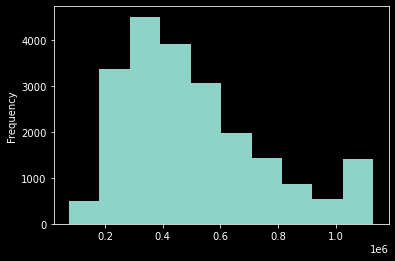

In [17]:
data['Sale Price'].plot.hist()

In [18]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [29]:
data.dropna(inplace=True, axis=0,subset=['Sale Price'])
data['Sale Price'].isnull().sum()

0

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [31]:
#numerical column
numerical_columns = ['No of Bathrooms', 'Flat Area (in Sqft)','Lot Area (in Sqft)',
                     'Area of the House from Basement (in Sqft)','Latitude',
                     'Longitude','Living Area after Renovation (in Sqft)']

In [33]:
#imputing missing values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='median')
data[numerical_columns]=imputer.fit_transform(data[numerical_columns])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [35]:
#zipcode transform
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(data['Zipcode'].values.reshape(-1,1))

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [38]:
data['Zipcode'].shape

(21609,)

In [39]:
column = data["Zipcode"].values.reshape(-1,1)
column.shape

(21609, 1)

In [40]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(column)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [42]:
#No of time visited transformation
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [44]:
#String to categorical
def visited(value):
    if value=="Once":
        return 1
    elif value=="Twice":
        return 2
    elif value=="Thrice":
        return 3
    elif value=="Four":
        return 4
    else:
        return 0
        
data['No of Times Visited']=data['No of Times Visited'].map(visited)
data['No of Times Visited'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [46]:
#new variable creation of renovation
data['Ever Renovated']=np.where(data['Renovated Year']==0,'No','Yes')#it is categorical variable

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  int64  
 10  Condition of the House

In [48]:
#new column for renovation year if rennovated
data['Purchase Year']=pd.DatetimeIndex(data['Date House was Sold']).year
data['Years since Renovation']=np.where(data['Ever Renovated']=='Yes',abs(data['Purchase Year']-data['Renovated Year']),0)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  int64  
 10  Condition of the House

In [50]:
#delete renovated year,purchase year,ever renovated
data.drop( columns = ['Purchase Year', 'Date House was Sold', 'Renovated Year'], inplace = True)

In [51]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [52]:
data.drop( columns = 'ID', inplace = True)

In [53]:
#plotting codition of the house
data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<AxesSubplot:xlabel='Condition of the House'>

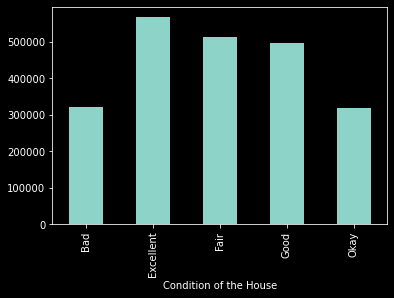

In [54]:
data.groupby('Condition of the House')['Sale Price'].mean().plot(kind = 'bar')

<BarContainer object of 5 artists>

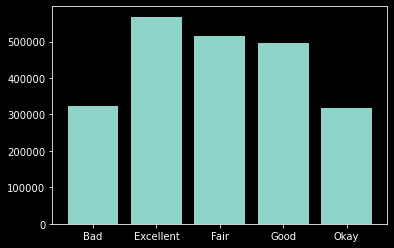

In [59]:
z2=pd.pivot_table(data, index =["Condition of the House"],values=["Sale Price"],aggfunc=np.mean)
plt.bar(z2.index, z2['Sale Price'])

<AxesSubplot:xlabel='Condition of the House'>

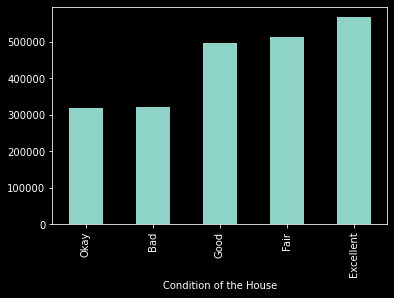

In [64]:
data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Waterfront View'>

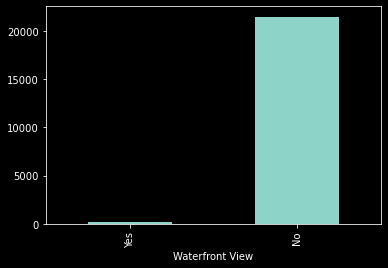

In [65]:
data.groupby('Waterfront View',
            )['Sale Price'].count().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Ever Renovated'>

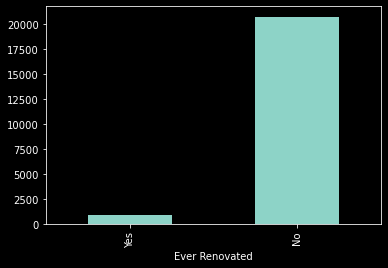

In [66]:
data.groupby('Ever Renovated',
            )['Sale Price'].count().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Ever Renovated'>

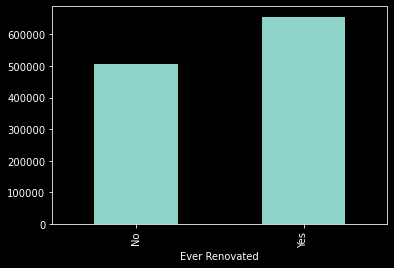

In [68]:
data.groupby('Ever Renovated')['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Zipcode'>

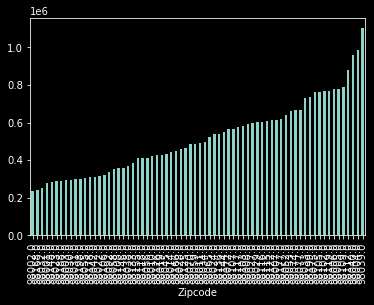

In [69]:
data.groupby('Zipcode',)['Sale Price'].mean().sort_values().plot(kind = 'bar')

In [76]:
#variable transformation
data.dropna(inplace=True)
X = data.drop(columns=['Sale Price'])
Y = data['Sale Price']

In [77]:
def distribution(data ,var):
  plt.figure(figsize = (len(var)*6,6), dpi = 120)
  for j,i in enumerate(var):
    plt.subplot(1,len(var),j+1)
    plt.hist(data[i])
    plt.title(i)

In [80]:
numerical_columns = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years since Renovation']

In [83]:
for i in numerical_columns:
  X[i] = pd.to_numeric(X[i])
  #print(X[i])

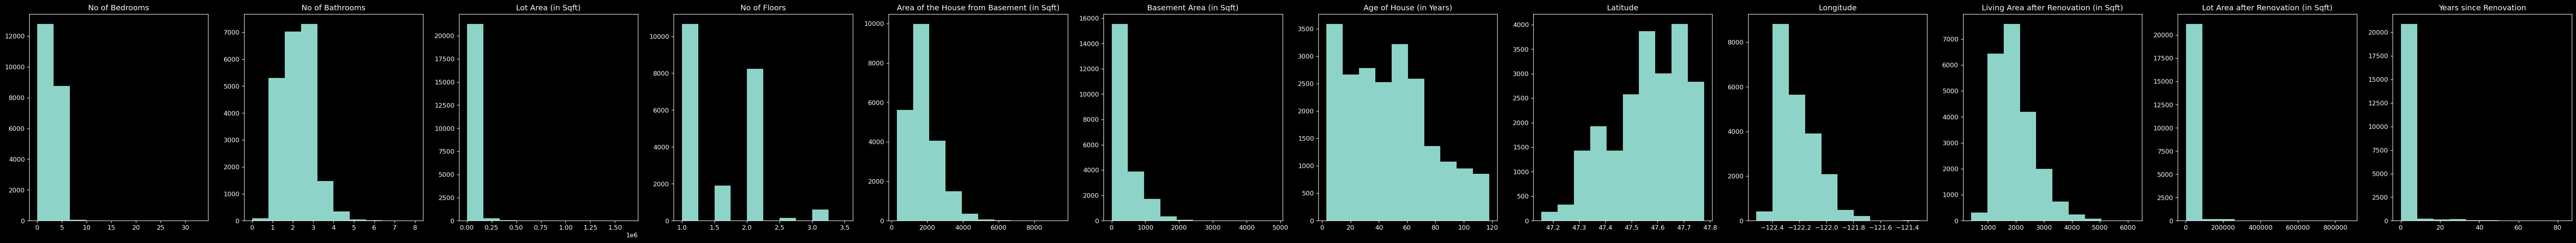

In [84]:
distribution(X, numerical_columns)

In [87]:
#removing right skew
def right_skew(x):
  return np.log(abs(x+500))

right_skew_variables = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
        'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years since Renovation']

In [88]:
for i in right_skew_variables:
  X[i] = X[i].map(right_skew)

# removing infinite values
X = X.replace(np.inf, np.nan)
X.dropna(inplace=True)

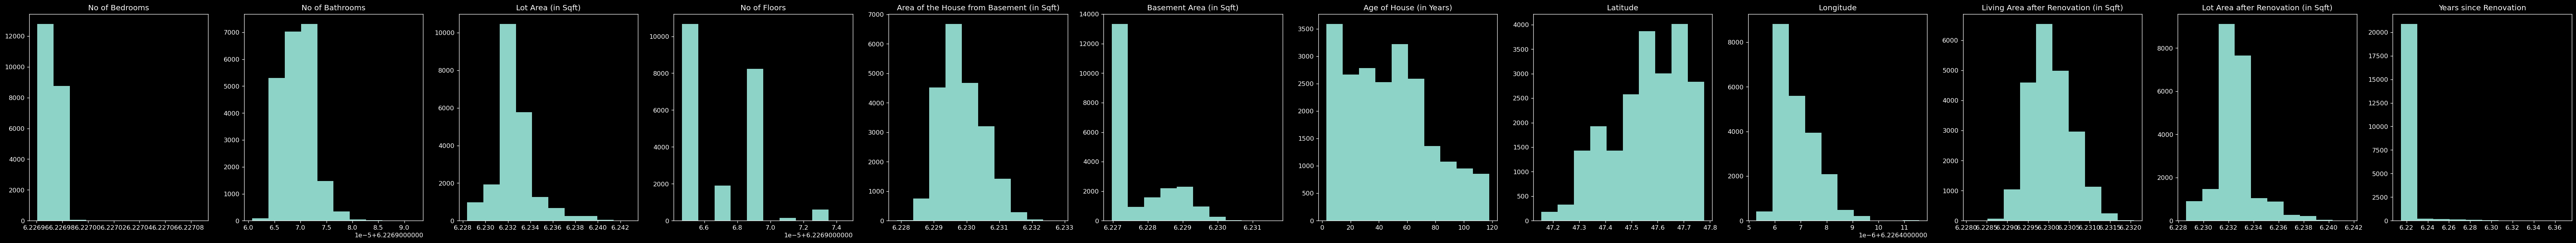

In [89]:
distribution(X, numerical_columns)

In [90]:
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation
0,6.226973,6.226965,1180.0,6.231906,6.226965,No,0,Fair,7,6.229352,6.226961,63,98178.0,47.5112,6.226407,6.229531,6.231906,No,6.214608
1,6.226973,6.226970,2570.0,6.232358,6.226969,No,0,Fair,7,6.230265,6.228121,67,98125.0,47.7210,6.226406,6.229874,6.232457,Yes,6.265301
2,6.226969,6.226965,770.0,6.232957,6.226965,No,0,Fair,6,6.228800,6.226961,85,98028.0,47.7379,6.226407,6.230633,6.232556,No,6.214608
3,6.226976,6.226973,1960.0,6.231686,6.226965,No,0,Excellent,7,6.229193,6.229007,53,98136.0,47.5208,6.226406,6.229553,6.231686,No,6.214608
4,6.226973,6.226969,1680.0,6.232560,6.226965,No,0,Fair,8,6.229865,6.226961,31,98074.0,47.6168,6.226408,6.229971,6.232424,No,6.214608


In [91]:
X["Waterfront View"] = X["Waterfront View"].map({    'No':0,
   'Yes':1
})


X['Condition of the House'] = X['Condition of the House'].map({'Bad':1,
                                                                     'Okay':2,
                                                                     'Fair':3,
                                                                     'Good':4,
                                                                     'Excellent':5
})

X['Ever Renovated'] = X['Ever Renovated'].map({
    'No':0,
    'Yes':1
})

X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation
0,6.226973,6.226965,1180.0,6.231906,6.226965,0,0,3,7,6.229352,6.226961,63,98178.0,47.5112,6.226407,6.229531,6.231906,0,6.214608
1,6.226973,6.226970,2570.0,6.232358,6.226969,0,0,3,7,6.230265,6.228121,67,98125.0,47.7210,6.226406,6.229874,6.232457,1,6.265301
2,6.226969,6.226965,770.0,6.232957,6.226965,0,0,3,6,6.228800,6.226961,85,98028.0,47.7379,6.226407,6.230633,6.232556,0,6.214608
3,6.226976,6.226973,1960.0,6.231686,6.226965,0,0,5,7,6.229193,6.229007,53,98136.0,47.5208,6.226406,6.229553,6.231686,0,6.214608
4,6.226973,6.226969,1680.0,6.232560,6.226965,0,0,3,8,6.229865,6.226961,31,98074.0,47.6168,6.226408,6.229971,6.232424,0,6.214608


In [93]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale Price']
X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation
0,-0.398646,-1.448933,-0.979905,-0.411841,-0.915605,-0.087181,-0.30579,-0.629203,-0.563993,-0.767575,-0.726430,0.544734,1.870094,-0.352576,-0.306108,-1.027661,-0.416287,-0.210155,-0.168911
1,-0.398646,0.176497,0.533718,-0.138806,0.937194,-0.087181,-0.30579,-0.629203,-0.563993,0.642315,0.539015,0.680915,0.879534,1.161645,-0.746519,-0.355795,-0.047631,4.758385,4.827106
2,-1.477795,-1.448933,-1.426369,0.222409,-0.915605,-0.087181,-0.30579,-0.629203,-1.468566,-1.619628,-0.726430,1.293731,-0.933379,1.283619,-0.135645,1.130676,0.019005,-0.210155,-0.168911
3,0.678355,1.149811,-0.130534,-0.544371,-0.915605,-0.087181,-0.30579,2.444136,-0.563993,-1.012806,1.504571,0.204281,1.085122,-0.283288,-1.272266,-0.985942,-0.563303,-0.210155,-0.168911
4,-0.398646,-0.148264,-0.435436,-0.016952,-0.915605,-0.087181,-0.30579,-0.629203,0.340581,0.025444,-0.726430,-0.544715,-0.073647,0.409587,1.199268,-0.166751,-0.069794,-0.210155,-0.168911


In [94]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation
No of Bedrooms,1.000000,0.516646,0.577470,0.175714,0.175996,-0.006617,0.079649,0.028514,0.349935,0.509519,0.276721,-0.154614,-0.153164,-0.008867,0.129998,0.404819,0.154570,0.018555,-0.006734
No of Bathrooms,0.516646,1.000000,0.754414,0.104886,0.500980,0.063683,0.187657,-0.124874,0.635778,0.696037,0.253984,-0.506206,-0.204098,0.024506,0.223332,0.572399,0.095689,0.050239,0.004644
Flat Area (in Sqft),0.577470,0.754414,1.000000,0.341686,0.354268,0.103841,0.284678,-0.058922,0.705725,0.853616,0.373179,-0.318146,-0.199380,0.052538,0.240124,0.739462,0.318668,0.055111,0.024552
Lot Area (in Sqft),0.175714,0.104886,0.341686,1.000000,-0.218972,0.074354,0.121725,0.066323,0.165722,0.319775,0.056326,-0.005815,-0.279420,-0.146040,0.376130,0.361826,0.917927,0.022805,0.033049
No of Floors,0.175996,0.500980,0.354268,-0.218972,1.000000,0.023721,0.029503,-0.263676,0.461442,0.548423,-0.266623,-0.489232,-0.059289,0.049640,0.125724,0.277803,-0.211192,0.006318,-0.000379
Waterfront View,-0.006617,0.063683,0.103841,0.074354,0.023721,1.000000,0.401856,0.016650,0.070332,0.063276,0.063249,0.026149,0.030286,-0.014275,-0.041934,0.080559,0.083262,0.093291,0.105822
No of Times Visited,0.079649,0.187657,0.284678,0.121725,0.029503,0.401856,1.000000,0.045978,0.223661,0.161089,0.249394,0.053395,0.084830,0.006162,-0.078472,0.268492,0.118821,0.104051,0.094621
Condition of the House,0.028514,-0.124874,-0.058922,0.066323,-0.263676,0.016650,0.045978,1.000000,-0.143747,-0.153567,0.176036,0.361383,0.003076,-0.015008,-0.106546,-0.090174,0.073555,-0.060152,-0.012115
Overall Grade,0.349935,0.635778,0.705725,0.165722,0.461442,0.070332,0.223661,-0.143747,1.000000,0.723787,0.116024,-0.456711,-0.185844,0.111226,0.201765,0.676764,0.167500,0.010010,-0.023473
Area of the House from Basement (in Sqft),0.509519,0.696037,0.853616,0.319775,0.548423,0.063276,0.161089,-0.153567,0.723787,1.000000,-0.111372,-0.448716,-0.285312,-0.015295,0.360199,0.720707,0.301194,0.026074,0.013461


In [95]:
k=X.corr()
z=[]
for i in k.columns :
     for j in k.columns :
         if (k.loc[i,j] >abs(0.5))&(i!=j):
              za = [str(i), str(j)]
              z.append(za)
len(z),z

(34,
 [['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bedrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Gr

In [96]:
#calculate vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=X
#calculate vif for every column
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

No of Bedrooms                                1.736922
No of Bathrooms                               3.424525
Flat Area (in Sqft)                          21.438744
Lot Area (in Sqft)                            6.854159
No of Floors                                  2.390207
Waterfront View                               1.211023
No of Times Visited                           1.415564
Condition of the House                        1.260555
Overall Grade                                 2.905740
Area of the House from Basement (in Sqft)    23.213433
Basement Area (in Sqft)                       6.541685
Age of House (in Years)                       2.458384
Zipcode                                       1.668851
Latitude                                      1.191524
Longitude                                     1.880325
Living Area after Renovation (in Sqft)        2.916939
Lot Area after Renovation (in Sqft)           6.610192
Ever Renovated                                3.022758
Years sinc

In [97]:
VIF[VIF==VIF.max()]. index[0],VIF[VIF==VIF.max()]. values

('Area of the House from Basement (in Sqft)', array([23.21343329]))

In [98]:
#multicolinearity removal method
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(vif_data.values,i)for i in range(vif_data.shape[1])],index=vif_data.columns)
    if vif.max()>5:
        print(vif[vif==vif.max()]. index[0],"has been removed")
        data=data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicolinearity present a)ny more")
        return data
        

In [99]:
for i in range(7):#7 variables exhibiting multicolinearity
    vif_data=MC_remover(vif_data)
    
vif_data.head()

Area of the House from Basement (in Sqft) has been removed
Lot Area (in Sqft) has been removed
Flat Area (in Sqft) has been removed
No multicolinearity present a)ny more
No multicolinearity present a)ny more
No multicolinearity present a)ny more
No multicolinearity present a)ny more


,No of Bedrooms,No of Bathrooms,No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation
0,-0.398646,-1.448933,-0.915605,-0.087181,-0.30579,-0.629203,-0.563993,-0.726430,0.544734,1.870094,-0.352576,-0.306108,-1.027661,-0.416287,-0.210155,-0.168911
1,-0.398646,0.176497,0.937194,-0.087181,-0.30579,-0.629203,-0.563993,0.539015,0.680915,0.879534,1.161645,-0.746519,-0.355795,-0.047631,4.758385,4.827106
2,-1.477795,-1.448933,-0.915605,-0.087181,-0.30579,-0.629203,-1.468566,-0.726430,1.293731,-0.933379,1.283619,-0.135645,1.130676,0.019005,-0.210155,-0.168911
3,0.678355,1.149811,-0.915605,-0.087181,-0.30579,2.444136,-0.563993,1.504571,0.204281,1.085122,-0.283288,-1.272266,-0.985942,-0.563303,-0.210155,-0.168911
4,-0.398646,-0.148264,-0.915605,-0.087181,-0.30579,-0.629203,0.340581,-0.726430,-0.544715,-0.073647,0.409587,1.199268,-0.166751,-0.069794,-0.210155,-0.168911


In [100]:
#vif for Remaining columns
VIF=pd.Series([variance_inflation_factor(vif_data.values,i)for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(vif_data.columns)

(No of Bedrooms                            1.498201
 No of Bathrooms                           2.950074
 No of Floors                              2.186149
 Waterfront View                           1.209183
 No of Times Visited                       1.410552
 Condition of the House                    1.253804
 Overall Grade                             2.541289
 Basement Area (in Sqft)                   1.639832
 Age of House (in Years)                   2.392458
 Zipcode                                   1.666022
 Latitude                                  1.183418
 Longitude                                 1.857959
 Living Area after Renovation (in Sqft)    2.503689
 Lot Area after Renovation (in Sqft)       1.553973
 Ever Renovated                            3.017576
 Years since Renovation                    2.868472
 dtype: float64,
 16)

In [101]:
X = vif_data[:]
X

,No of Bedrooms,No of Bathrooms,No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation
0,-0.398646,-1.448933,-0.915605,-0.087181,-0.30579,-0.629203,-0.563993,-0.726430,0.544734,1.870094,-0.352576,-0.306108,-1.027661,-0.416287,-0.210155,-0.168911
1,-0.398646,0.176497,0.937194,-0.087181,-0.30579,-0.629203,-0.563993,0.539015,0.680915,0.879534,1.161645,-0.746519,-0.355795,-0.047631,4.758385,4.827106
2,-1.477795,-1.448933,-0.915605,-0.087181,-0.30579,-0.629203,-1.468566,-0.726430,1.293731,-0.933379,1.283619,-0.135645,1.130676,0.019005,-0.210155,-0.168911
3,0.678355,1.149811,-0.915605,-0.087181,-0.30579,2.444136,-0.563993,1.504571,0.204281,1.085122,-0.283288,-1.272266,-0.985942,-0.563303,-0.210155,-0.168911
4,-0.398646,-0.148264,-0.915605,-0.087181,-0.30579,-0.629203,0.340581,-0.726430,-0.544715,-0.073647,0.409587,1.199268,-0.166751,-0.069794,-0.210155,-0.168911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,-0.398646,0.501097,2.786298,-0.087181,-0.30579,-0.629203,0.340581,-0.726430,-1.293712,0.468358,1.005026,-0.938334,-0.648478,-1.890245,-0.210155,-0.168911
21605,0.678355,0.501097,0.937194,-0.087181,-0.30579,-0.629203,0.340581,-0.726430,-1.463938,1.272020,-0.356184,-1.052008,-0.116765,-0.120562,-0.210155,-0.168911
21606,-1.477795,-1.774507,0.937194,-0.087181,-0.30579,-0.629203,-0.563993,-0.726430,-1.293712,1.234640,0.247916,-0.604443,-1.765071,-1.598243,-0.210155,-0.168911
21607,-0.398646,0.501097,0.937194,-0.087181,-0.30579,-0.629203,0.340581,-0.726430,-1.123485,-0.952068,-0.184409,1.028891,-0.883582,-2.044702,-0.210155,-0.168911


In [103]:
#train set and Test set
x=vif_data
y=data['Sale Price']

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 16), (6483, 16), (15126,), (6483,))

In [105]:
# training model
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [106]:
lr.coef_

array([  1586.16662942,  42606.86281078,  23305.61990782,   9989.74678821,
        30485.28229177,  16059.33610946, 108947.70895216,  11325.75178588,
        65052.28712527, -15609.10167519,  75616.69585276,  -7742.02631577,
        54276.80096347,   2006.22123993,  16443.12928547, -11319.51908304])

In [107]:
predictions=lr.predict(x_test)
lr.score(x_test,y_test)
predictions

array([ 608501.38322963,  648408.35081787,  445441.16432098, ...,
        816321.6251544 ,  925755.58991137, 1150486.9954506 ])

In [108]:
lr.score(x_test, y_test)

0.7344348109102565

In [109]:
##Residuals
residuals=predictions-y_test
residual_table=pd.DataFrame({'residuals':residuals,
                            'predictions':predictions})
residual_table=residual_table.sort_values(by='predictions')
residual_table

,residuals,predictions
19452,-530576.046086,-3.885760e+05
1149,-415788.273541,-3.407883e+05
18379,-363830.485834,-9.883049e+04
13716,-240016.044670,-6.001604e+04
6480,-271095.748410,-5.409575e+04
...,...,...
8784,178662.236566,1.308237e+06
18477,190596.259445,1.320171e+06
18556,277103.641467,1.406679e+06
1315,285786.335823,1.415361e+06


In [110]:
z=[i for i in range(int(residual_table['predictions'].max()))]
k=[0 for i in range(int(residual_table['predictions'].max()))]

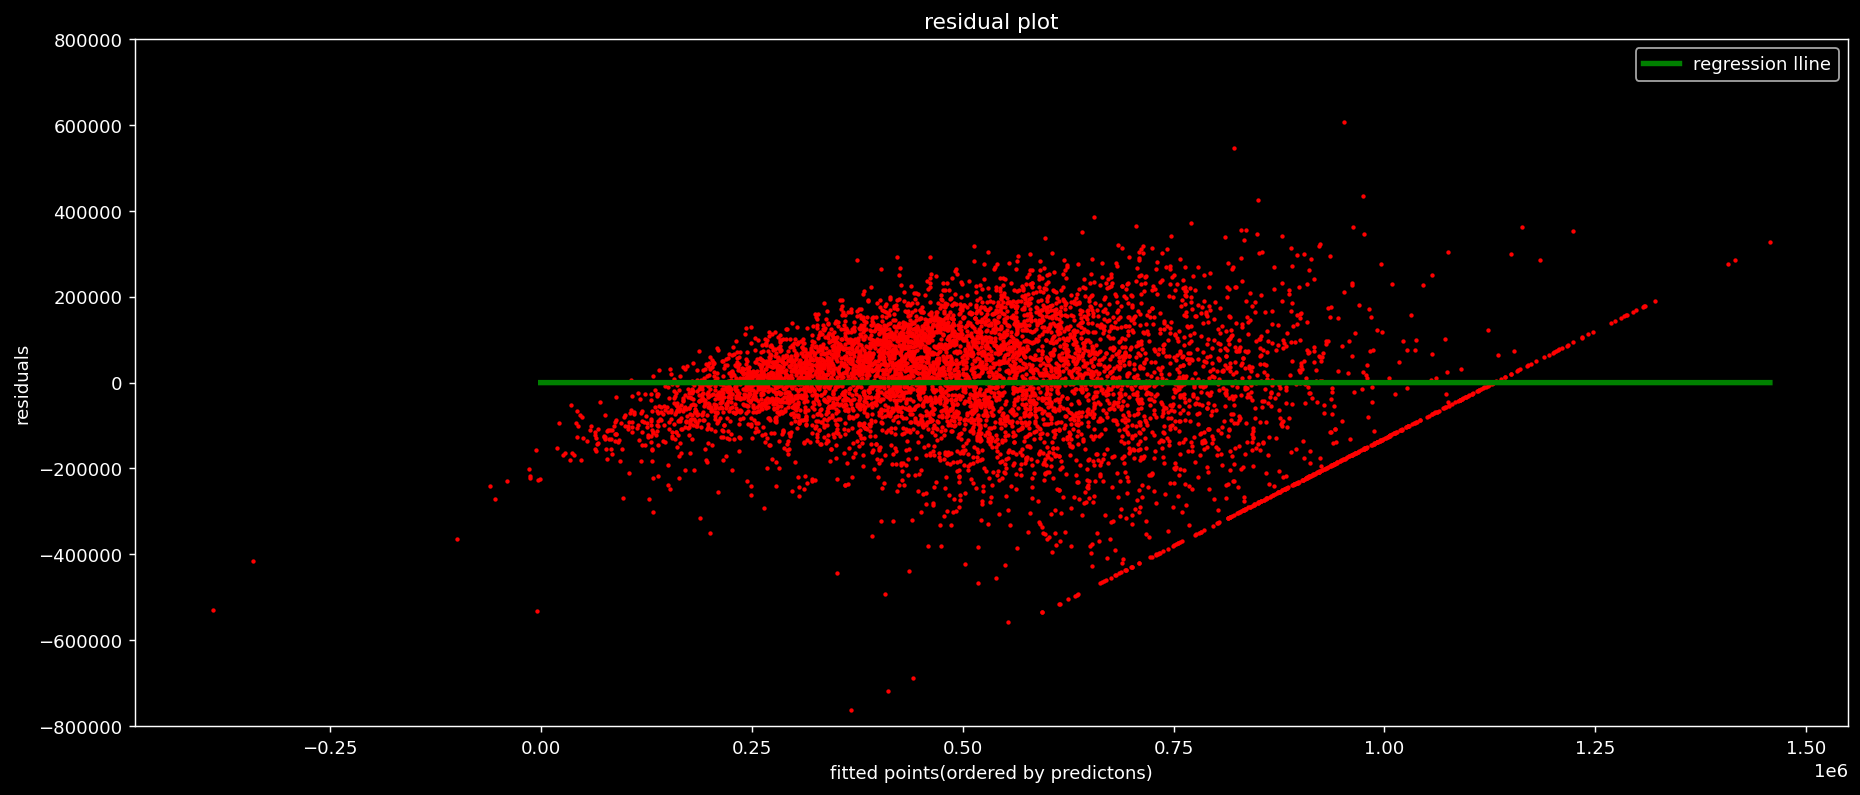

In [111]:
plt.figure(dpi=130,figsize=(17,7))
plt.scatter(residual_table['predictions'],residual_table['residuals'],color='red',s=2)
plt.plot(z,k,color='green',linewidth=3,label='regression lline')
plt.ylim(-800000,800000)
plt.xlabel('fitted points(ordered by predictons)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

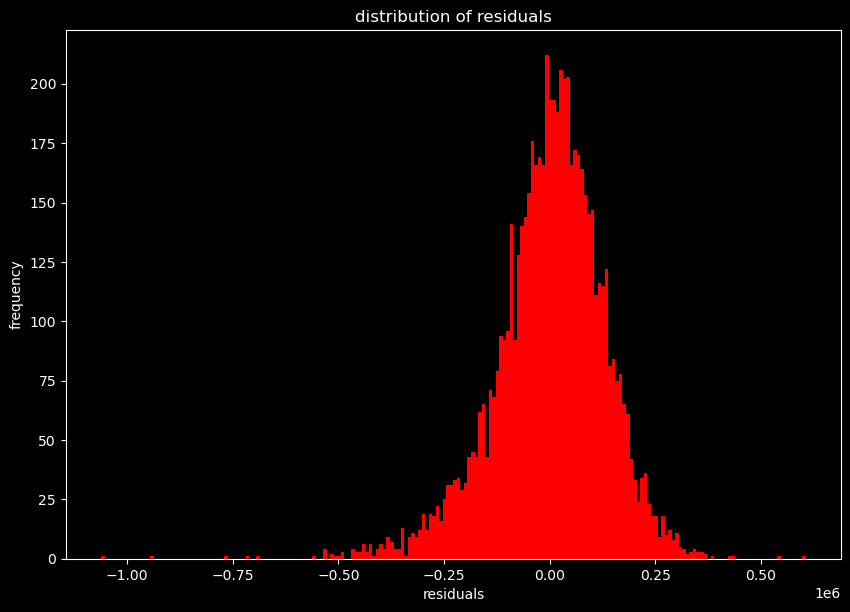

In [112]:
##distribution of error
plt.figure(dpi=100,figsize=(10,7))
plt.hist(residual_table['residuals'],color='red',bins=200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

In [113]:
##Model coffecirent
coefficients_table=pd.DataFrame({'column':x_train.columns,
                                'coefficients':lr.coef_})
coefficients_table=coefficients_table.sort_values(by='coefficients')
coefficients_table

,column,coefficients
9,Zipcode,-15609.101675
15,Years since Renovation,-11319.519083
11,Longitude,-7742.026316
0,No of Bedrooms,1586.166629
13,Lot Area after Renovation (in Sqft),2006.221240
3,Waterfront View,9989.746788
7,Basement Area (in Sqft),11325.751786
5,Condition of the House,16059.336109
14,Ever Renovated,16443.129285
2,No of Floors,23305.619908


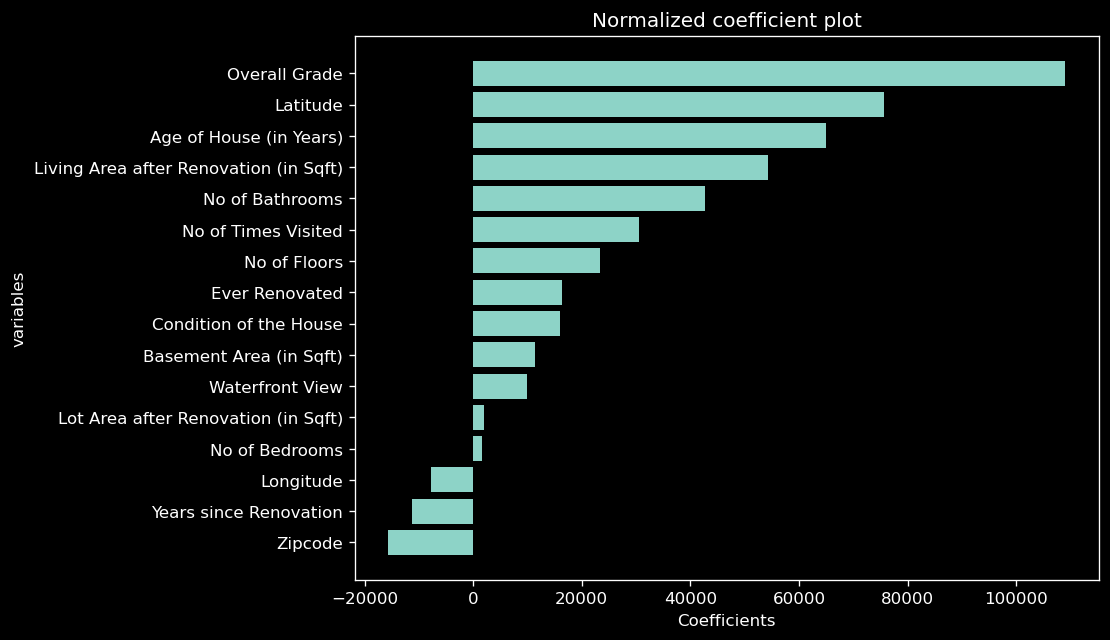

In [114]:
plt.figure(figsize=(8,6),dpi=120)
x=coefficients_table['column']
y=coefficients_table['coefficients']
plt.barh(x,y)
plt.xlabel("Coefficients")
plt.ylabel("variables")
plt.title("Normalized coefficient plot")
plt.show()